# </font> <font color = #4854E8> SUPPORT VECTOR REGRESSOR </font>

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

<b> Data Information </b>

<b>Bike Sharing Dataset:</b> 

<b> Link: </b> <br>
https://www.kaggle.com/code/gauravduttakiit/bike-sharing-multiple-linear-regression/data

<b> Importing the Libaries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore") 

<b> Importing the dataset </b>

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b> Data Summery and Visulaization </b>

In [4]:
print(f'The number of columns :{df.shape[0]}')
print(f'The number of rows    :{df.shape[1]}')

The number of columns :730
The number of rows    :16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


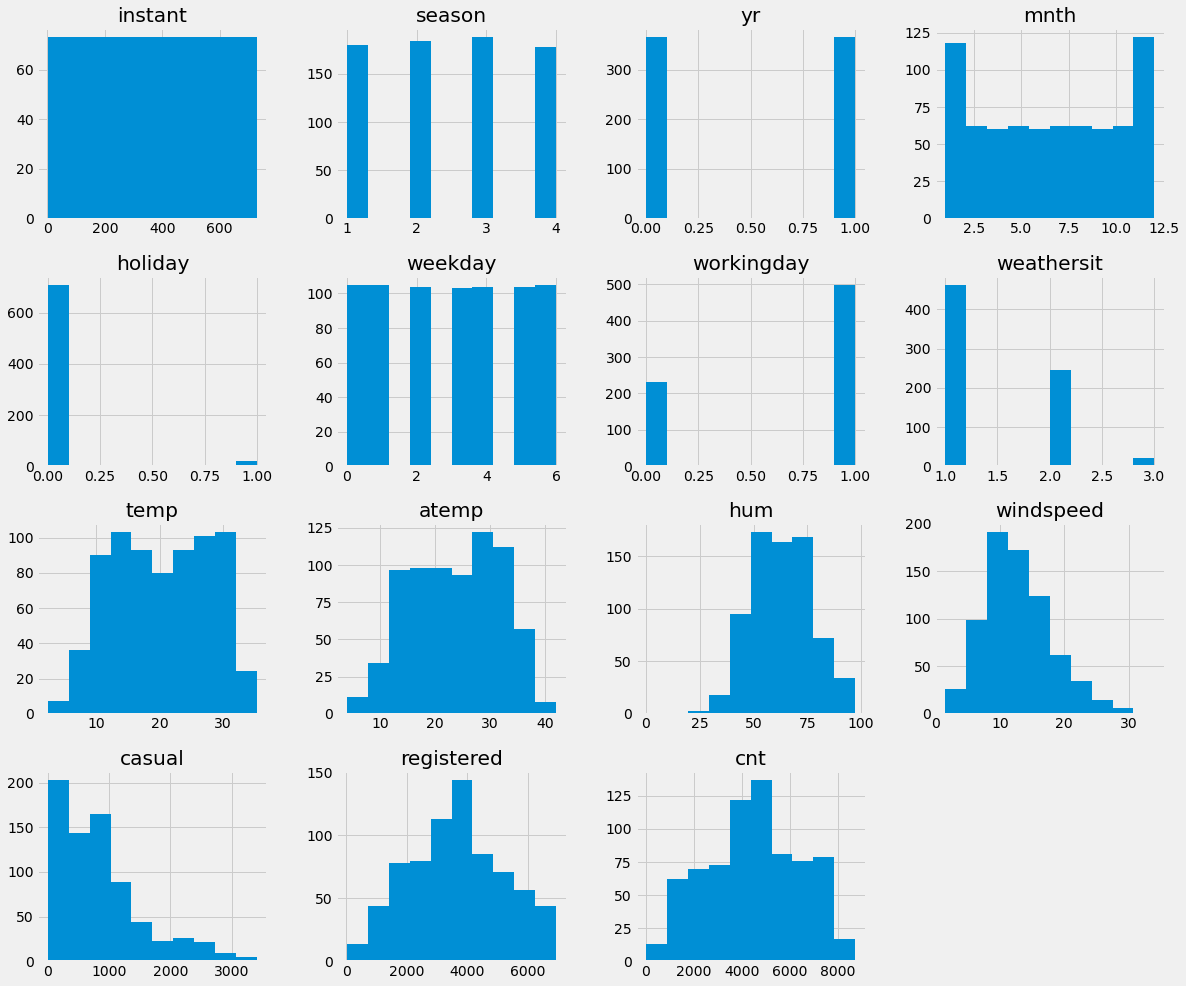

In [7]:
df.hist(figsize=(18,16))
plt.show()

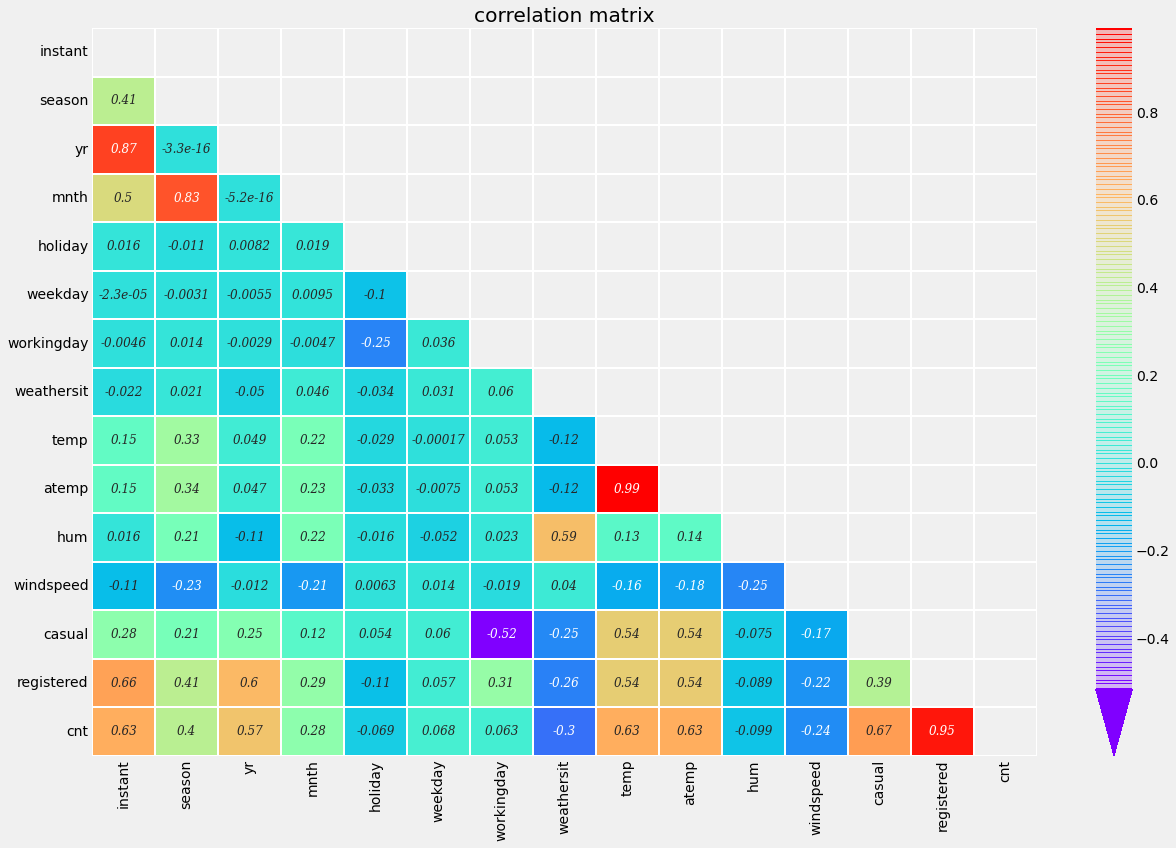

In [8]:
plt.figure(figsize=(18,12))
annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif','alpha':1}
cbar_kws = {'shrink':1, 'extend':'min', 'extendfrac':0.1, 'drawedges':True}
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, annot=True, cmap='rainbow', linewidth=0.2, annot_kws=annot_kws, cbar_kws=cbar_kws)
plt.title('correlation matrix')
plt.tight_layout()

<b> Data Preprocessing </b>

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df = df.drop(['instant', 'dteday'],axis=1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


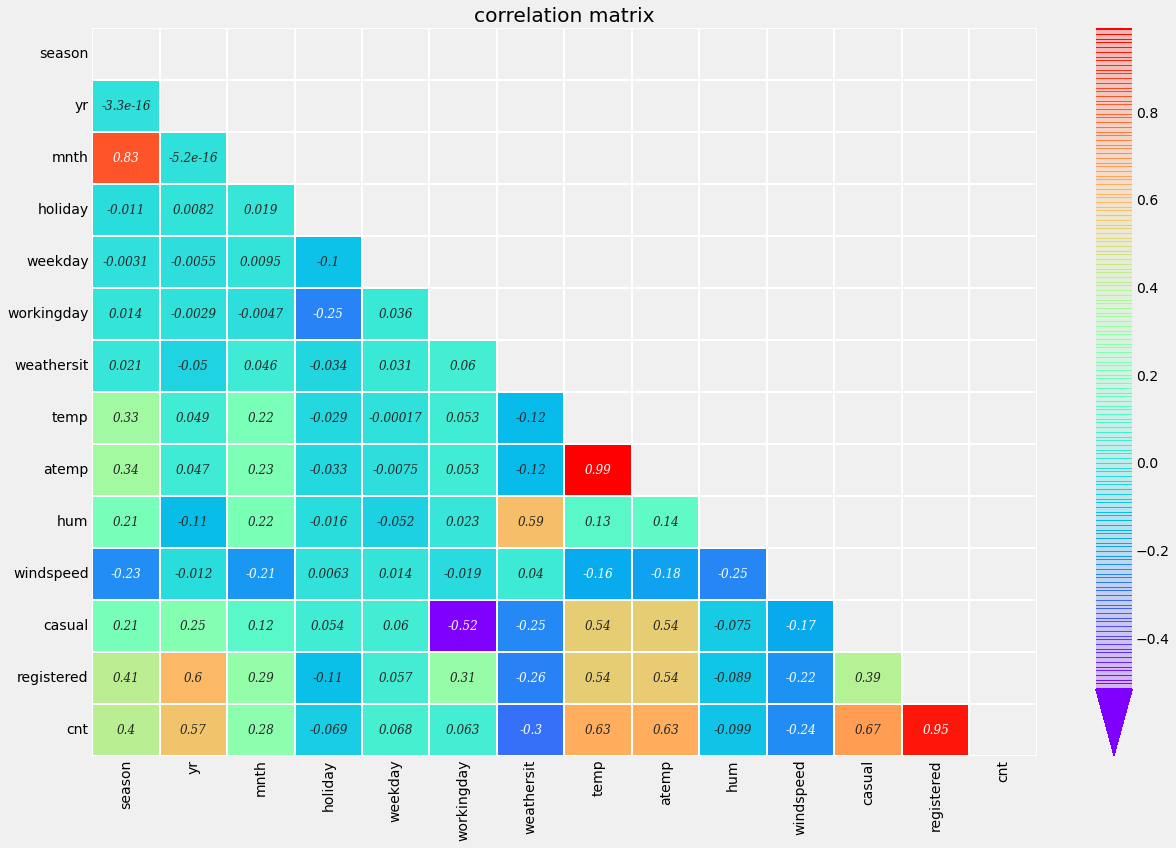

In [12]:
plt.figure(figsize=(18,12))
annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif','alpha':1}
cbar_kws = {'shrink':1, 'extend':'min', 'extendfrac':0.1, 'drawedges':True}
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, annot=True, cmap='rainbow', linewidth=0.2, annot_kws=annot_kws, cbar_kws=cbar_kws)
plt.title('correlation matrix')
plt.tight_layout()

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [15]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

<b> Spliting the data into train and test </b>

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (584, 13)
y_train (584,)
X_test (146, 13)
y_test (146,)


In [18]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.439227,-0.989778,0.129950,-0.167836,1.491381,-1.486200,-0.719250,1.058888,1.020640,-0.294204,0.237423,2.298627,-0.092996
1,0.439227,-0.989778,0.129950,-0.167836,0.491993,0.672857,-0.719250,1.403349,1.317666,0.178544,-0.403795,-0.134854,0.126157
2,-1.367170,-0.989778,-1.608006,-0.167836,1.491381,-1.486200,1.155938,-1.406745,-1.363429,-0.909667,-0.419936,-0.912866,-1.724467
3,-1.367170,-0.989778,-1.318347,-0.167836,-0.507395,0.672857,1.155938,-1.630605,-1.446424,1.450965,-1.786740,-1.168791,-1.535588
4,-1.367170,1.010327,-1.608006,-0.167836,0.491993,0.672857,1.155938,-0.817529,-0.703860,1.022945,-1.523390,-0.880692,0.121550


<b> Buliding the Support Vector Regressor </b>

In [19]:
from sklearn.svm import SVR

In [20]:
regressor = SVR(kernel='rbf')

In [21]:
regressor.fit(X_train,y_train)

SVR()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([4554.69570874, 4559.01456586, 4475.32008376, 4475.91536063,
       4500.91182726, 4495.77342378, 4494.51465071, 4567.93405466,
       4535.92463898, 4467.99605245, 4462.70472636, 4476.90598541,
       4469.9565552 , 4553.69810866, 4556.69179214, 4518.89295874,
       4593.89003124, 4551.94916197, 4496.63504227, 4471.63018169,
       4602.8369389 , 4497.17755363, 4543.32085123, 4536.86373631,
       4485.46837213, 4575.37833298, 4547.03979605, 4559.02335118,
       4583.37971641, 4566.84510557, 4485.04635512, 4560.76872473,
       4586.68004938, 4552.65655338, 4489.70800901, 4503.6814789 ,
       4600.11623795, 4561.71785684, 4479.27117099, 4494.82691879,
       4499.54446893, 4475.47804512, 4548.79144095, 4495.01895451,
       4601.25956641, 4586.82125391, 4513.31250307, 4517.71365229,
       4491.23205448, 4475.5650061 , 4570.30093961, 4598.85947946,
       4564.11414092, 4593.42213785, 4535.6417382 , 4510.06933026,
       4502.83164153, 4568.02765931, 4598.94190151, 4488.73238

<b> Evaluate the Result </b>

In this part, we evaluate the Linear Regression Model. And for evaluation we will use three metrics. <br>

`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>

`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>

`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_pred,y_test)
print('r square error :',r2)
mean_square = mean_squared_error(y_pred,y_test)
print('mean squared error :',mean_square)
mean_absolute = mean_absolute_error(y_pred,y_test)
print('mean absolute error :',mean_absolute)

r square error : -2984.0666514128243
mean squared error : 4285876.164410747
mean absolute error : 1724.4141097725844


<b> Making a single prediction </b>

<font color = blue>How many  count if ..?

In [25]:
col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

pd.DataFrame([[1, 0, 1, 0, 6, 0, 2, 16.33211, 19.18125, 79.5833, 11.749882, 331, 654, '?']], columns = col)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,16.33211,19.18125,79.5833,11.749882,331,654,?


In [26]:
regressor.predict(SS.transform(np.array([[1, 0, 1, 0, 6, 0, 2, 16.33211, 19.18125, 79.5833, 11.749882, 331, 654]])))

array([4479.62224299])